#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [1]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

In [6]:
pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -------------------------------------  276.5/278.7 kB 8.6 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=b643ae0839e75bc0d664da735f85b8a632d936c1707f97a97f4740c06a86bed1
  Stored in directory: c:\users\mah292\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd

from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [8]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
import pydotplus

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline   


In [13]:
df1 = pd.read_csv('car_evaluation_0.csv')
df1.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
427,vhigh,low,5more,more,med,high,acc
428,vhigh,low,5more,more,big,low,unacc
429,vhigh,low,5more,more,big,med,acc
430,vhigh,low,5more,more,big,high,acc
431,high,vhigh,2,2,small,low,unacc


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [15]:
df2 = pd.read_csv('car_evaluation_1.csv')
df2.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
427,high,low,5more,more,med,high,acc
428,high,low,5more,more,big,low,unacc
429,high,low,5more,more,big,med,acc
430,high,low,5more,more,big,high,acc
431,med,vhigh,2,2,small,low,unacc


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [17]:
df3 = pd.read_csv('car_evaluation_2.csv')
df3.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
427,med,low,5more,more,med,high,vgood
428,med,low,5more,more,big,low,unacc
429,med,low,5more,more,big,med,good
430,med,low,5more,more,big,high,vgood
431,low,vhigh,2,2,small,low,unacc


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [19]:
df4 = pd.read_csv('car_evaluation_3.csv')
df4.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
426,low,low,5more,more,med,med,good
427,low,low,5more,more,med,high,vgood
428,low,low,5more,more,big,low,unacc
429,low,low,5more,more,big,med,good
430,low,low,5more,more,big,high,vgood


In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     431 non-null    object
 1   maintCost    431 non-null    object
 2   noDoors      431 non-null    object
 3   noPersons    431 non-null    object
 4   bootLuggage  431 non-null    object
 5   safety       431 non-null    object
 6   decision     431 non-null    object
dtypes: object(7)
memory usage: 23.7+ KB


In [27]:
df=pd.concat([df1,df2,df3,df4], ignore_index = True)
df.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [36]:
df["buyPrice"].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buyPrice, dtype: int64

In [29]:
df["maintCost"].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maintCost, dtype: int64

In [30]:
df["noDoors"].value_counts()

3        432
4        432
5more    432
2        431
Name: noDoors, dtype: int64

In [31]:
df["noPersons"].value_counts()

4       576
more    576
2       575
Name: noPersons, dtype: int64

In [32]:
df["bootLuggage"].value_counts()

med      576
big      576
small    575
Name: bootLuggage, dtype: int64

In [33]:
df["safety"].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [34]:
df["decision"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [46]:
df.replace(to_replace=["low","med","high","vhigh"],value=[1,2,3,4],inplace=True)

In [47]:
df.replace(to_replace=["small","big"],value=[1,3],inplace=True)

In [48]:
df.replace(to_replace=["2","3","4","5more","more"],value=[2,3,4,5,5],inplace=True)

In [49]:
df.replace(to_replace=["unacc","acc","good","vgood"],value=[1,2,3,4],inplace=True)

In [50]:
df

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1
...,...,...,...,...,...,...,...
1722,1,1,5,5,2,2,3
1723,1,1,5,5,2,3,4
1724,1,1,5,5,3,1,1
1725,1,1,5,5,3,2,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [54]:
#to reduce size
columns = ["buyPrice","maintCost","noDoors","noPersons","bootLuggage","safety","decision"]

for column in columns:
    df[column]=pd.to_numeric(df[column],downcast="integer")


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int8 
 1   maintCost    1727 non-null   int8 
 2   noDoors      1727 non-null   int8 
 3   noPersons    1727 non-null   int8 
 4   bootLuggage  1727 non-null   int8 
 5   safety       1727 non-null   int8 
 6   decision     1727 non-null   int8 
dtypes: int8(7)
memory usage: 11.9 KB


In [64]:
X = df.drop('decision',axis=1).values


In [65]:
y=df["decision"].values

In [66]:
print(X.shape)
print(y.shape)
print (X)
print (y)

(1727, 6)
(1727,)
[[4 4 2 2 1 2]
 [4 4 2 2 1 3]
 [4 4 2 2 2 1]
 ...
 [1 1 5 5 3 1]
 [1 1 5 5 3 2]
 [1 1 5 5 3 3]]
[1 1 1 ... 1 3 4]


In [67]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .10, random_state = 42)

In [71]:
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(1554, 6)
(173, 6)
(1554,)
(173,)


In [72]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

In [73]:
clf_entropy = clf_entropy.fit(X_train,y_train)

In [75]:
feature_name = df.columns[:-1]
target_name = df.columns[-1]

print(feature_name, "\n")
print(target_name)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

decision


In [77]:
tree.export_graphviz(clf_entropy,out_file="tree_grid_clf_entropy.dot",
                    feature_names = feature_name,
                    filled=True)

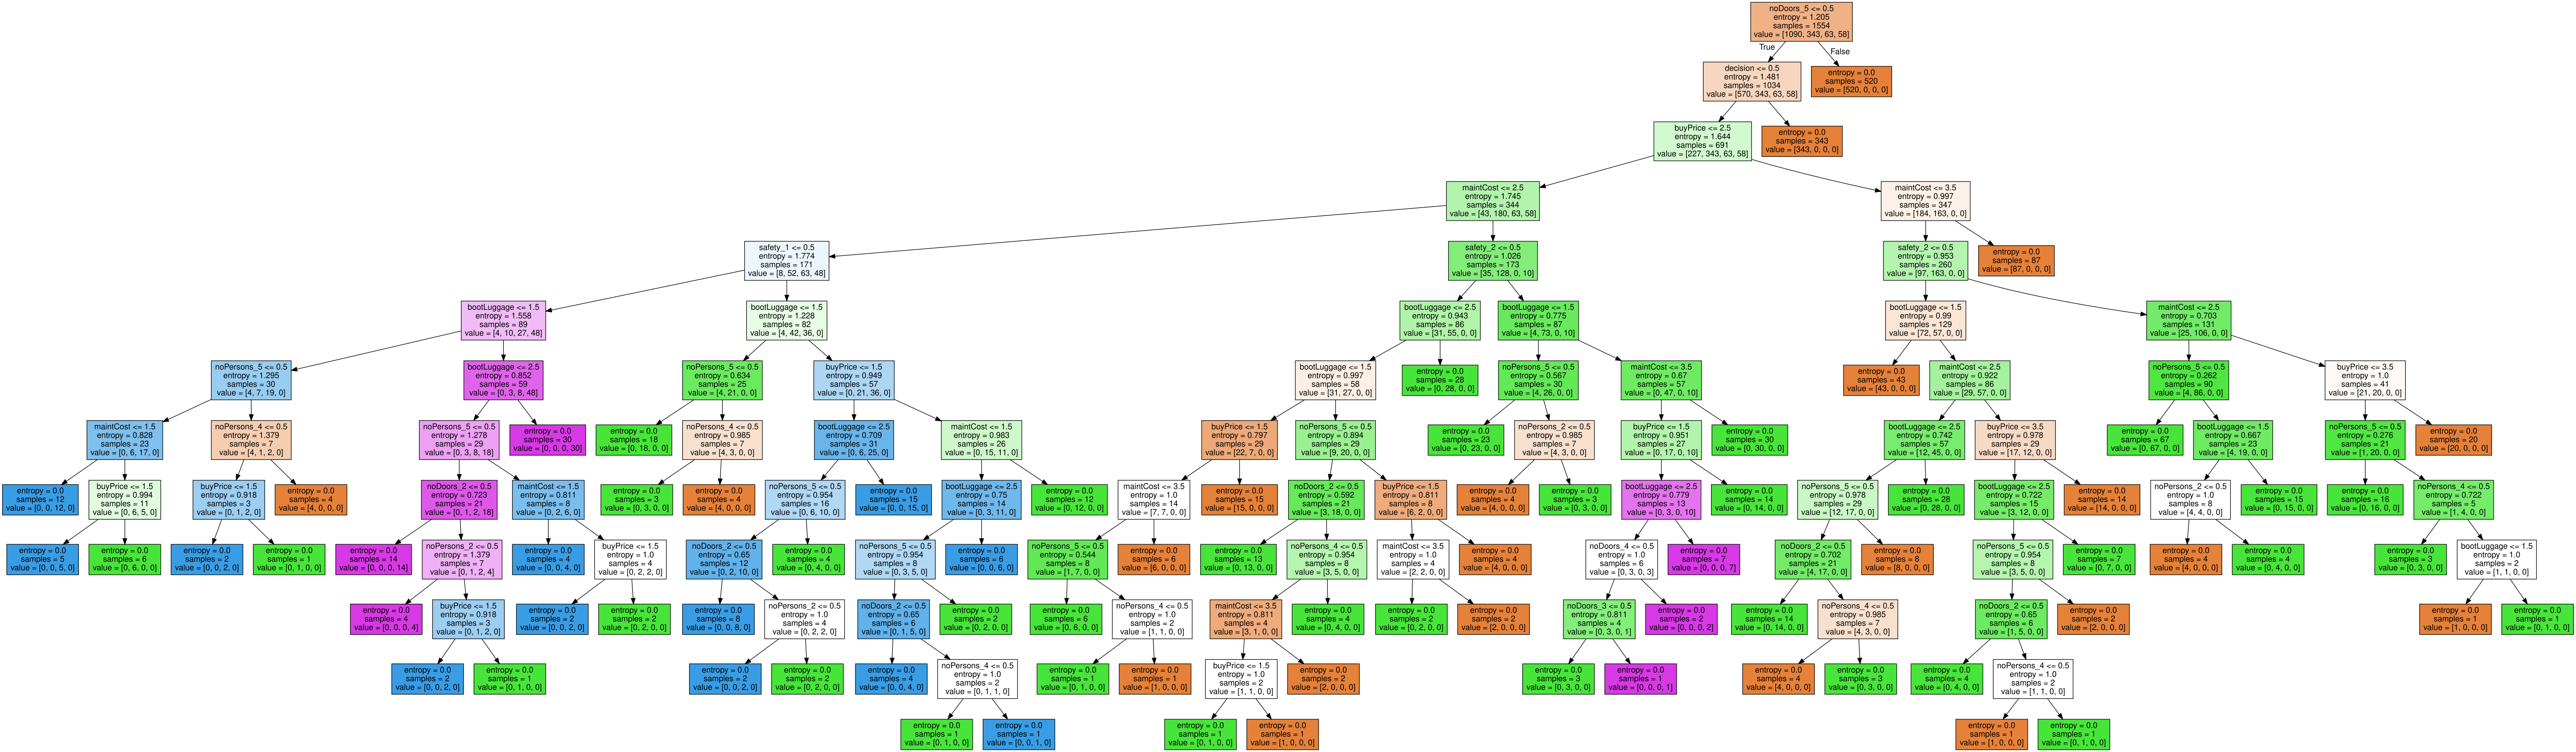

In [82]:

display(Image("tree_grid_clf_entropy.png"))



# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################